# Tabular modeling with sklearn (and fastai)

Tabular data is data that is arranged in a structure of multiple columns. Each column represents one feature of the dataset. 

In this notebook, the tabular dataset we use comes from Kaggle and contains various medical features that can be used to predict the `target` column. The target is the dependent variable: Does this person have a high chance of heart attack or not.

This dataset is simple: All features are numerical already, so we don't need to to any handling of categorical features here.

In [1]:
from pathlib import Path

import pandas as pd

## Load data

Column meaning according to Kaggle page:

- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp : Chest Pain type chest pain type
  - Value 1: typical angina
  - Value 2: atypical angina
  - Value 3: non-anginal pain
  - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg : resting electrocardiographic results
  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- target : 0= less chance of heart attack 1= more chance of heart attack


In [2]:
data_path = Path('../data/heart-attack-analysis/')

In [3]:
list(data_path.iterdir())

[PosixPath('../data/heart-attack-analysis/dataset-license.txt'),
 PosixPath('../data/heart-attack-analysis/heart.csv'),
 PosixPath('../data/heart-attack-analysis/o2Saturation.csv')]

In [4]:
df = pd.read_csv(data_path / 'heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Train test split

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=23)

In [6]:
train_y, train_xs = train.output, train.drop(columns=['output'])

In [7]:
test_y, test_xs = test.output, test.drop(columns=['output'])

In [8]:
# Make sure the output column has been dropped
train_xs

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2


# Modeling

In [9]:
import fastbook
fastbook.setup_book()

from fastbook import *

## Decision tree (77.0%)

In [10]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_leaf_nodes=10)
tree.fit(train_xs, train_y)

DecisionTreeClassifier(max_leaf_nodes=10)

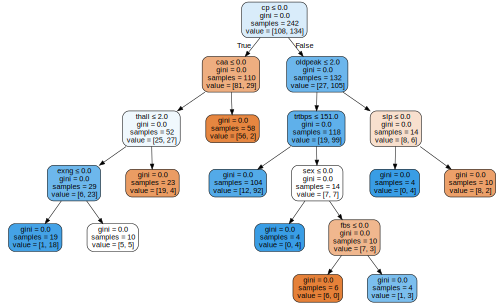

In [11]:
draw_tree(tree, train_xs, size=7)

In [12]:
test_yhat = tree.predict(test_xs)

In [13]:
# Accuracy
(test_yhat == test_y).astype(int).mean()

0.7704918032786885

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, test_yhat)

0.7704918032786885

In [15]:
from sklearn.metrics import classification_report

print(classification_report(test_y, test_yhat))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        30
           1       0.79      0.74      0.77        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



## Logistic regression (82.0%)

In [16]:
# Logistic regression requires data normalization for proper convergence
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(train_xs)

In [17]:
train_xs_norm = scaler.transform(train_xs)

In [18]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(train_xs_norm, train_y)

LogisticRegression()

In [19]:
test_yhat = classifier.predict(scaler.transform(test_xs))

In [20]:
accuracy_score(test_y, test_yhat)

0.819672131147541

## Random forest (86.9%)

In [21]:
from sklearn.ensemble import RandomForestClassifier

def build_random_forest(
    xs, 
    y, 
    n_estimators=40, 
    max_features=0.5, 
    min_samples_leaf=5
):

    return RandomForestClassifier(
        n_estimators=n_estimators,
        max_features=max_features,
        min_samples_leaf=min_samples_leaf,
        bootstrap=True,
        oob_score=True
    ).fit(xs, y)

In [22]:
forest = build_random_forest(train_xs, train_y)

In [23]:
accuracy_score(
    test_y,
    forest.predict(test_xs)
)

0.8032786885245902

Running different configurations below yield performance that's slightly better than logistic regression.

However, what's curious: The score should be higher for trees with max_features lower 1 - but that's not what happens. Why not?

In [24]:
def run_random_forest(n_estimators, max_features):
    forest = build_random_forest(train_xs, train_y, n_estimators, max_features)
    accuracy = accuracy_score(
        test_y,
        forest.predict(test_xs)
    )
    return accuracy

0.8688524590163934


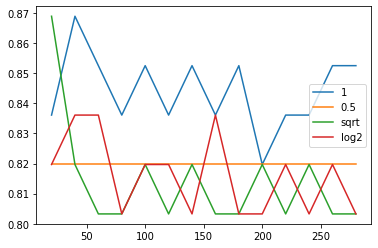

In [25]:
from itertools import product

best_score = 0.
for max_features in [1, 0.5, 'sqrt', 'log2']:
    n_estimator_values = list(range(20, 300, 20))
    accuracies = [
        run_random_forest(n_estimators, max_features)
        for n_estimators in n_estimator_values
    ]
    best_score = max(best_score, max(accuracies))
    plt.plot(n_estimator_values, accuracies, label=str(max_features))

print(best_score)
plt.legend()
plt.show()


# Model interpretation

The trained models have captured some information about the data that we can inspect to a) understand more about the underlying data and b) improve our models.

## Feature importance

Which is the most important feature to identify increased risk of heart attacks?

In [26]:
feature_imp = pd.DataFrame({
    "feature": train_xs.columns,
    "importance": np.stack([tree.feature_importances_ for tree in forest.estimators_]).mean(0)
})
feature_imp.sort_values(by='importance', ascending=False, inplace=True)

In [27]:
feature_imp

,feature,importance
2,cp,0.288542
11,caa,0.166916
12,thall,0.128635
9,oldpeak,0.091222
0,age,0.069067
7,thalachh,0.062245
8,exng,0.057659
3,trtbps,0.043706
1,sex,0.034271
4,chol,0.031958


<AxesSubplot:ylabel='feature'>

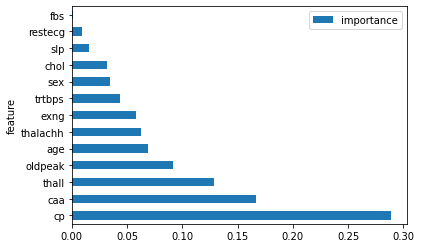

In [28]:
feature_imp.plot.barh(x='feature', y='importance')

We can see that the most important features are:
1. cp: Chest pain type
2. caa: Number of major vessels
3. thall: Maximum heart rate achieved

The least important features are:
1. fbs: fasting blood sugar
2. restecg: resting electrocardiographic results
3. slp: ?

Do these features make sense? I'm not sure, would have to do some research on actual heart attack factors from the literature.

## Understand single predictions using waterfall charts

When looking at a single row from the dataset we can visualize how its prediction came to be using two helper libraries:

In [29]:
!pip install treeinterpreter
!pip install waterfallcharts

In [30]:
from treeinterpreter import treeinterpreter
import waterfall_chart

In [31]:
# Get predictions for test data
prediction, bias, contributions = treeinterpreter.predict(forest, test_xs.values)

In [32]:
# treeinterpreter yields results for each of our 2 classes, we can simplify to class zero only
sample_idx = 0
class_idx = 0
contributions_class_0 = contributions[sample_idx,:,class_idx]

In [33]:
# Let's look at the sample again
test_xs.iloc[sample_idx:sample_idx+1]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3


<module 'matplotlib.pyplot' from '/home/flo/miniconda3/envs/practice-ml/lib/python3.7/site-packages/matplotlib/pyplot.py'>

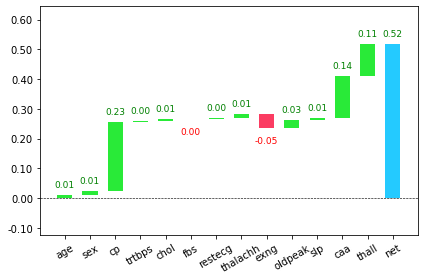

In [34]:
waterfall_chart.plot(test_xs.columns, contributions_class_0, formatting='{:,.2f}')